In [1]:
import os
import sys

#  Set the working directory to the folder containing the top-level ultralytics package
os.chdir("/workspace")  # change to your workspace root where ultralytics folder exists
print("Current working directory:", os.getcwd())


Current working directory: /workspace


In [3]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 67800, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 67800 (delta 61), reused 30 (delta 21), pack-reused 67677 (from 2)
Receiving objects: 100% (67800/67800), 36.01 MiB | 8.35 MiB/s, done.
Resolving deltas: 100% (50671/50671), done.
Updating files: 100% (778/778), done.
/workspace/ultralytics


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import sys

#  Set the working directory to the folder containing the top-level ultralytics package
print("Current working directory:", os.getcwd())


Current working directory: /workspace


In [3]:
#  Add the top-level ultralytics folder to Python path
os.chdir("/workspace/ultralytics")
print("Current working directory:", os.getcwd())

Current working directory: /workspace/ultralytics


In [4]:
from ultralytics import YOLO

# This will download yolov8l.pt automatically if not present
model = YOLO("yolov8l.pt")


In [5]:
from ultralytics import YOLO

# -------------------------------
# Load YAML (with original SPPF)
# -------------------------------
model = YOLO('yolov8.yaml')
print("Original model loaded ")


WARNING ⚠️ no model scale passed. Assuming scale='l'.
Original model loaded 


In [6]:
import ultralytics
print(ultralytics.__file__)


/workspace/ultralytics/ultralytics/__init__.py


In [7]:
from ultralytics.models.yolo.model import YOLO

# Load your YOLOv8 model (with CBAM if added)
model = YOLO("ultralytics/cfg/models/v8/yolov8.yaml")

# Print the full architecture
print(model.model)   # model.model contains the actual PyTorch nn.Module


WARNING ⚠️ no model scale passed. Assuming scale='l'.
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runn

In [8]:
print("Current working directory:", os.getcwd())


Current working directory: /workspace/ultralytics


In [9]:
from ultralytics.nn import tasks
from ultralytics.models.yolo.model import YOLO

model = YOLO("ultralytics/cfg/models/v8/yolov8.yaml")
model.info()


WARNING ⚠️ no model scale passed. Assuming scale='l'.
YOLOv8 summary: 209 layers, 43,635,237 parameters, 43,635,221 gradients


(209, 43635237, 43635221, 0.0)

In [10]:
import torch
from ultralytics import YOLO

# --- Load model ---
model = YOLO("yolov8.yaml")  # your custom model
model.eval()  # evaluation mode

# --- Create dummy input ---
dummy_img = torch.randn(1, 3, 640, 640)  # batch_size=1, 3 channels, 640x640

# --- Forward pass through the model ---
with torch.no_grad():
    preds = model.model(dummy_img)  # list of outputs from YOLO layers

# --- Pick one output and compute a dummy EIoU loss ---
from ultralytics.utils.loss import BboxLoss
from ultralytics.utils.metrics import bbox_iou

# fake target boxes (x1,y1,x2,y2)
target_boxes = torch.tensor([[100, 100, 200, 200]], dtype=torch.float32)
pred_boxes = torch.tensor([[110, 110, 210, 210]], dtype=torch.float32)

bbox_loss_fn = BboxLoss()
# Mask & dummy target scores
fg_mask = torch.tensor([True])
target_scores = torch.tensor([[1.0]])
target_scores_sum = torch.tensor(1.0)

loss_iou, loss_dfl = bbox_loss_fn(
    pred_dist=torch.zeros(1, 16, 4),      # dummy DFL input
    pred_bboxes=pred_boxes,
    anchor_points=torch.zeros(1, 2),      # dummy anchors
    target_bboxes=target_boxes,
    target_scores=target_scores,
    target_scores_sum=target_scores_sum,
    fg_mask=fg_mask
)

print(f"[Sanity Check] loss_iou = {loss_iou.item()}, loss_dfl = {loss_dfl.item()}")


WARNING ⚠️ no model scale passed. Assuming scale='l'.
[Sanity Check] loss_iou = 0.3275921940803528, loss_dfl = 2.7725887298583984


In [13]:
from ultralytics import YOLO
import time
import torch

# === Device setup ===
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# === Load default YOLOv8 architecture ===
model = YOLO("yolov8.yaml").to(device)  # Use default YAML, not custom CBAM YAML

# === Set box loss to EIoU only ===
model.box_loss_type = "eiou"  # Enable EIoU
# Classification and objectness remain default BCE
model.cls_loss_type = "bce"  # placeholder (doesn't impact)
model.obj_loss_type = "bce"  # placeholder (doesn't impact)

# === Enable EMA ===
model.ema = True

# === Training parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"  # Custom KITTI dataset YAML
run_name = "yolov8l_eiou_sgd_pat20"  # Run name for saving logs and weights
epochs = 2            # Max epochs
imgsz = 1280            # Image size
batch_size = 32         # Batch size
workers = 2             # Data loader workers
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cache_images = "disk"   # Cache images to disk
amp = True              # Mixed precision
save_interval = 50      # Save checkpoint every 50 epochs
patience = 20           # Early stopping patience

# === EMA status ===
print("\n=== EMA STATUS ===")
print(f"EMA enabled: {model.ema}")

# === Detect layer info ===
print("\n=== DETECT LAYER INFO ===")
detect_layer = model.model.model[-1]
print(f"  Classes (nc): {detect_layer.nc}")
try:
    print(f"  Strides: {detect_layer.stride}")
    print(f"  Number of detection heads: {len(detect_layer.stride)}")
except Exception as e:
    print(f"  Could not read strides/heads: {e}")

# === Model summary ===
print("\n=== MODEL SUMMARY ===")
print(model.model)

# === Loss type verification ===
print("\n=== LOSS TYPE VERIFICATION ===")
print(f"Box loss type: {model.box_loss_type}")
print(f"Class loss type: {model.cls_loss_type}")
print(f"Object loss type: {model.obj_loss_type}")

# === Start full training ===
print("\n=== STARTING FULL TRAINING ===")
start_time = time.time()

results = model.train(
    data=dataset_yaml,
    pretrained="yolov8l.pt",  # Use COCO pretrained weights
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    workers=workers,
    device=device,
    cache=cache_images,
    name=run_name,
    save=True,
    amp=amp,
    patience=patience,
    save_period=save_interval
)

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/3600:.2f} hours")


WARNING ⚠️ no model scale passed. Assuming scale='l'.

=== EMA STATUS ===
EMA enabled: True

=== DETECT LAYER INFO ===
  Classes (nc): 7
  Strides: tensor([ 8., 16., 32.], device='cuda:0')
  Number of detection heads: 3

=== MODEL SUMMARY ===
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True

In [ ]:
from ultralytics import YOLO
import time
import torch

# === Device setup ===
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# === Load default YOLOv8 architecture ===
model = YOLO("yolov8.yaml").to(device)  # Use default YAML, not custom CBAM YAML

# === Set box loss to EIoU only ===
model.box_loss_type = "eiou"  # Enable EIoU
# Classification and objectness remain default BCE
model.cls_loss_type = "bce"  # placeholder (doesn't impact)
model.obj_loss_type = "bce"  # placeholder (doesn't impact)

# === Enable EMA ===
model.ema = True

# === Training parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"  # Custom KITTI dataset YAML
run_name = "yolov8l_eiou_sgd_pat20"  # Run name for saving logs and weights
epochs = 250            # Max epochs
imgsz = 1280            # Image size
batch_size = 32         # Batch size
workers = 2             # Data loader workers
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cache_images = "disk"   # Cache images to disk
amp = True              # Mixed precision
save_interval = 50      # Save checkpoint every 50 epochs
patience = 20           # Early stopping patience

# === EMA status ===
print("\n=== EMA STATUS ===")
print(f"EMA enabled: {model.ema}")

# === Detect layer info ===
print("\n=== DETECT LAYER INFO ===")
detect_layer = model.model.model[-1]
print(f"  Classes (nc): {detect_layer.nc}")
try:
    print(f"  Strides: {detect_layer.stride}")
    print(f"  Number of detection heads: {len(detect_layer.stride)}")
except Exception as e:
    print(f"  Could not read strides/heads: {e}")

# === Model summary ===
print("\n=== MODEL SUMMARY ===")
print(model.model)

# === Loss type verification ===
print("\n=== LOSS TYPE VERIFICATION ===")
print(f"Box loss type: {model.box_loss_type}")
print(f"Class loss type: {model.cls_loss_type}")
print(f"Object loss type: {model.obj_loss_type}")

# === Start full training ===
print("\n=== STARTING FULL TRAINING ===")
start_time = time.time()

results = model.train(
    data=dataset_yaml,
    pretrained="yolov8l.pt",  # Use COCO pretrained weights
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    workers=workers,
    device=device,
    cache=cache_images,
    name=run_name,
    save=True,
    amp=amp,
    patience=patience,
    save_period=save_interval
)

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/3600:.2f} hours")


WARNING ⚠️ no model scale passed. Assuming scale='l'.

=== EMA STATUS ===
EMA enabled: True

=== DETECT LAYER INFO ===
  Classes (nc): 7
  Strides: tensor([ 8., 16., 32.], device='cuda:0')
  Number of detection heads: 3

=== MODEL SUMMARY ===
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True

In [12]:
import sys
from pathlib import Path
import torch
import time
from ultralytics import YOLO  # Use YOLOv8's interface

weights = "runs/detect/yolov8l_eiou_sgd_pat20/weights/best.pt"
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"
results_dir = "/workspace/yolov8l_eiou_sgd_pat20_val"

# ------------------- Device -------------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# ------------------- Load model -------------------
model = YOLO(weights)  # Load the model using YOLOv8
params = sum(p.numel() for p in model.model.parameters())
params_mb = params * 4 / (1024**2)  # float32 -> 4 bytes
model_size_mb = Path(weights).stat().st_size / 1024**2  # file size in MB

print(f"Model size (file): {model_size_mb:.2f} MB")
print(f"Model parameters: {params_mb:.2f} MB")

# ------------------- FPS Measurement -------------------
dummy_input = torch.randn(1, 3, 1280, 1280).to(device) / 255.0  # Normalize the dummy input
# Warm-up
for _ in range(5):
    _ = model(dummy_input)  # Use the model directly for inference

n_runs = 50
start_time = time.time()
for _ in range(n_runs):
    _ = model(dummy_input)  # Use the model directly for inference
end_time = time.time()

fps = n_runs / (end_time - start_time)
print(f"Inference FPS (1280x1280): {fps:.2f}")

# ------------------- Run Validation -------------------
print("\nRunning YOLOv8 validation...")
start_val_time = time.time()
model.val(
    data=dataset_yaml,  # Validation dataset
    imgsz=1280,          # Image size
    batch=64,            # Corrected batch size argument
    device=device,       # Device
    project=results_dir, # Results directory
    name="eval_metrics", # Name for saved results
    save_json=True,      # Save results as JSON
    exist_ok=True,       # Overwrite if results directory exists
    verbose=True         # Show verbose output
)
end_val_time = time.time()

val_time = end_val_time - start_val_time
print(f"Validation time: {val_time:.2f} seconds")
print(f"Validation results saved to {results_dir}")


Model size (file): 83.62 MB
Model parameters: 166.46 MB

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.7ms
Speed: 0.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 13.1ms
Speed: 0.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 

In [13]:
import numpy as np
import pandas as pd

# -----------------------------
# CONFIGURATION
# -----------------------------
class_names = ["Car", "Van", "Truck", "Pedestrian", "Person_sitting", "Cyclist", "Tram"]
num_classes = len(class_names)

# -----------------------------
# CONFUSION MATRIX (predicted rows x true cols)
# -----------------------------
conf_matrix = np.array([
    [5557, 3, 0, 0, 0, 2, 0, 290],
    [1, 549, 0, 0, 0, 0, 0, 26],
    [0, 0, 188, 0, 0, 0, 0, 4],
    [0, 0, 0, 807, 1, 0, 0, 84],
    [0, 0, 0, 0, 25, 0, 0, 7],
    [0, 0, 0, 1, 0, 280, 0, 28],
    [0, 0, 0, 0, 0, 0, 96, 8],
    [122, 11, 10, 88, 4, 24, 3, 0]
])

# -----------------------------
# PER-CLASS LOG
# -----------------------------
per_class_precision = [0.966, 0.968 , 0.989, 0.938, 0.817, 0.939, 0.958]  
per_class_recall =    [0.968, 0.957, 0.944, 0.85, 0.8, 0.898, 0.97]  
per_class_map50 = [0.987, 0.986, 0.981, 0.923, 0.83, 0.949, 0.973]
per_class_map5095 = [0.915, 0.911, 0.929, 0.615, 0.635, 0.807, 0.893]

# -----------------------------
# COMPUTE METRICS
# -----------------------------
metrics_data = []
total_samples = np.sum(conf_matrix)

for i, cname in enumerate(class_names):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[i, :]) - TP
    FN = np.sum(conf_matrix[:, i]) - TP
    TN = total_samples - (TP + FP + FN)

    #Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    #Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = per_class_precision[i] 
    Recall = per_class_recall[i]        
    F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) > 0 else 0
    Accuracy = (TP + TN) / total_samples if total_samples > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

    metrics_data.append({
        "Class": cname,
        "TP": int(TP),
        "FP": int(FP),
        "FN": int(FN),
        "TN": int(TN),
        "Precision": round(per_class_precision[i], 4),
        "Recall": round(per_class_recall[i], 4),
        "F1 Score": round(F1, 4),
        "Accuracy": round(Accuracy, 4),
        "FPR": round(FPR, 4),
        "FNR": round(FNR, 4),
        "mAP@0.5": per_class_map50[i],
        "mAP@0.5:0.95": per_class_map5095[i]
    })

# -----------------------------
# OVERALL ROW
# -----------------------------
TP_total = sum(row["TP"] for row in metrics_data)
FP_total = sum(row["FP"] for row in metrics_data)
FN_total = sum(row["FN"] for row in metrics_data)
TN_total = sum(row["TN"] for row in metrics_data)

overall = {
    "Class": "Overall",
    "TP": TP_total,
    "FP": FP_total,
    "FN": FN_total,
    "TN": TN_total,
    "Precision": np.mean([row["Precision"] for row in metrics_data]),
    "Recall": np.mean([row["Recall"] for row in metrics_data]),
    "F1 Score": np.mean([row["F1 Score"] for row in metrics_data]),
    "Accuracy": np.mean([row["Accuracy"] for row in metrics_data]),
    "FPR": np.mean([row["FPR"] for row in metrics_data]),
    "FNR": np.mean([row["FNR"] for row in metrics_data]),
    "mAP@0.5": np.mean([row["mAP@0.5"] for row in metrics_data]),
    "mAP@0.5:0.95": np.mean([row["mAP@0.5:0.95"] for row in metrics_data])
}

metrics_data.append(overall)

# -----------------------------
# SAVE TO CSV
# -----------------------------
df_metrics = pd.DataFrame(metrics_data)
df_metrics.to_csv("yolov8l_eiou_sgd_pat20_metrics.csv", index=False)
print(df_metrics)


            Class    TP   FP   FN     TN  Precision    Recall  F1 Score  \
0             Car  5557  295  123   2244   0.966000  0.968000  0.967000   
1             Van   549   27   14   7629   0.968000  0.957000  0.962500   
2           Truck   188    4   10   8017   0.989000  0.944000  0.966000   
3      Pedestrian   807   85   89   7238   0.938000  0.850000  0.891800   
4  Person_sitting    25    7    5   8182   0.817000  0.800000  0.808400   
5         Cyclist   280   29   26   7884   0.939000  0.898000  0.918000   
6            Tram    96    8    3   8112   0.958000  0.970000  0.964000   
7         Overall  7502  455  270  49306   0.939286  0.912429  0.925386   

   Accuracy       FPR       FNR  mAP@0.5  mAP@0.5:0.95  
0  0.949100  0.116200  0.021700    0.987         0.915  
1  0.995000  0.003500  0.024900    0.986         0.911  
2  0.998300  0.000500  0.050500    0.981         0.929  
3  0.978800  0.011600  0.099300    0.923         0.615  
4  0.998500  0.000900  0.166700    0.83


image 1/1 /workspace/000007.png: 416x1280 4 Cars, 1 Tram, 39.4ms
Speed: 2.1ms preprocess, 39.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 1280)


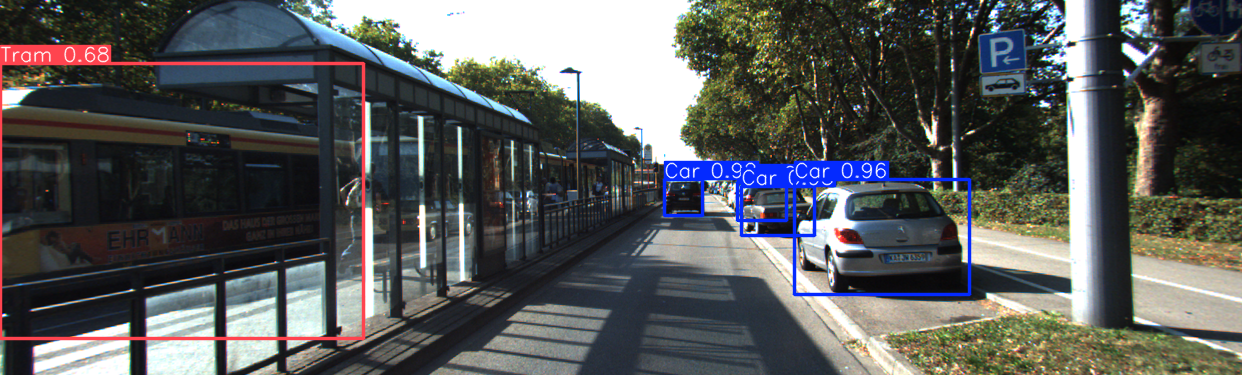

In [14]:
from ultralytics import YOLO

# Try loading and running inference with the trained model
model = YOLO("runs/detect/yolov8l_eiou_sgd_pat20/weights/best.pt")  # path to your trained model
results = model.predict("/workspace/000007.png")  # use any sample image
results[0].show()


In [16]:
import shutil

# Specify the folder path and the destination zip file path
folder_path = 'runs/detect/yolov8l_eiou_sgd_pat20'
zip_file_path = 'runs/detect/yolov8l_eiou_sgd_pat20.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

'/workspace/ultralytics/runs/detect/yolov8l_eiou_sgd_pat20.zip'

In [17]:
import shutil

# Specify the folder path and the destination zip file path
folder_path = '/workspace/yolov8l_eiou_sgd_pat20_val'
zip_file_path = '/workspace/yolov8l_eiou_sgd_pat20_val.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

'/workspace/yolov8l_eiou_sgd_pat20_val.zip'